# Finding Heavy Traffic Indicators on I-94

## Introduction

The purpose of this project is to analyze westbound traffic on the I-94 Interstate highway. The data used is provided by John Hogue and can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

The dataset contains the hourly traffic volume for MN DoT ATR station 301 located between Minneapolis and St Paul, MN. The dataset contains features pertaining to holidays and weather in addition to the traffic volume. 

## Exploratory Data Analysis


In [1]:
# Import packages
from mylib.lib import read_csv_file, stats_overview, split_day_night, hist_day_night

In [2]:
# Read in dataset
i_94_df = read_csv_file("Metro_Interstate_Traffic_Volume.csv.gz")
display(i_94_df)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
display(stats_overview(i_94_df, "traffic_volume"))

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000
median,3380.000000


Let's separate the dataset into night and day to see if there are any differences in the traffic volume statistics.

In [4]:
day_df, night_df = split_day_night(i_94_df)

display("Daytime traffic volume", stats_overview(day_df, "traffic_volume"))

'Daytime traffic volume'

,traffic_volume
count,23877.000000
mean,4762.047452
std,1174.546482
min,0.000000
25%,4252.000000
50%,4820.000000
75%,5559.000000
max,7280.000000
median,4820.000000


In [5]:
display("Nighttime traffic volume", stats_overview(night_df, "traffic_volume"))

'Nighttime traffic volume'

,traffic_volume
count,24327.000000
mean,1785.377441
std,1441.951197
min,0.000000
25%,530.000000
50%,1287.000000
75%,2819.000000
max,6386.000000
median,1287.000000


## Data Visualization

We will make a side-by-side histogram which will allow us to visualize the traffic volume in the day vs night.

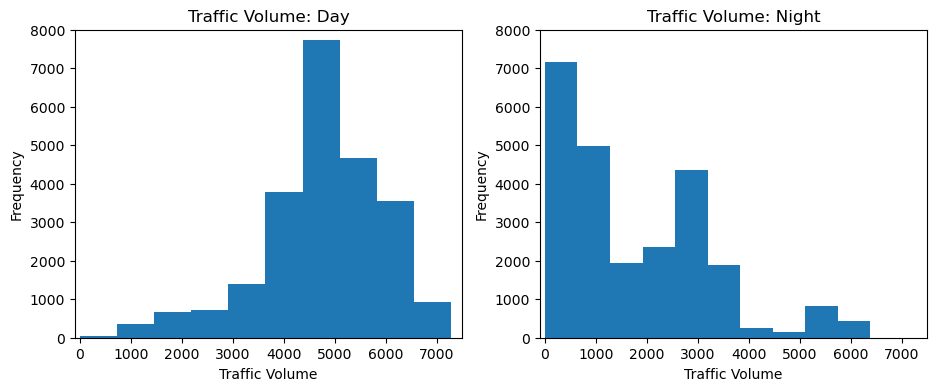

In [6]:
hist_day_night(day_df, night_df)

## Conclusion

The distribution of the traffic volume during the day is left skewed; indicating that most of traffic volume values are high. The distribution of the nighttime data is right skewed; indicating mostly low traffic volume values. 

Further analysis of this dataset could be performed to help find indicators of heavy traffic. Since traffic volumes are low in the evening, it would be reasonable to only analyze the daytime data.

Possible features to explore further are:
- Time indicators: Year, Month, Day, Hour
- Weather indicators
